In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers.recurrent import LSTM
from keras.layers import Embedding

import matplotlib.pyplot as plt

from keras.backend import tensorflow_backend
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

%matplotlib inline

np.random.seed(0)

In [10]:
# 前処理

def sine_wave():
    x = np.arange(0, 6, 0.01)
    y = np.sin(x)
    return y

f = sine_wave()

length_of_sequences = int(f.shape[0] * 0.8)
maxlen = int(f.shape[0] * 0.2)

data = []
target = []

for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])

X = np.array(data).reshape(len(data), maxlen, 1)
Y = np.array(target).reshape(len(data), 1)

N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=N_validation)

In [12]:
# モデル構築

n_in = len(X[0][0])
n_hidden = maxlen
n_out = len(Y[0])

def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)

model = Sequential()
model.add(LSTM(n_hidden,
                    kernel_initializer=weight_variable,
                    input_shape=(maxlen, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('linear'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Fitting

epochs = 200
batch_size = 50
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_validation, Y_validation),
          callbacks=[early_stopping]
         )

Instructions for updating:
Use tf.cast instead.
Train on 324 samples, validate on 37 samples
Epoch 1/200
324/324 [==============================] - 1s 4ms/step - loss: 0.5616 - val_loss: 0.4292
Epoch 2/200
324/324 [==============================] - 1s 2ms/step - loss: 0.4484 - val_loss: 0.2537
Epoch 3/200
324/324 [==============================] - 1s 2ms/step - loss: 0.2486 - val_loss: 0.1530
Epoch 4/200
324/324 [==============================] - 1s 2ms/step - loss: 0.1189 - val_loss: 0.0345
Epoch 5/200
324/324 [==============================] - 1s 2ms/step - loss: 0.0280 - val_loss: 0.0295
Epoch 6/200
324/324 [==============================] - 1s 2ms/step - loss: 0.0154 - val_loss: 0.0100
Epoch 7/200
324/324 [==============================] - 1s 2ms/step - loss: 0.0173 - val_loss: 0.0097
Epoch 8/200
324/324 [==============================] - 1s 2ms/step - loss: 0.0098 - val_loss: 0.0105
Epoch 9/200
324/324 [==============================] - 1s 2ms/step - loss: 0.0074 - val_loss: 0.006

Epoch 74/200
324/324 [==============================] - 1s 2ms/step - loss: 8.4531e-06 - val_loss: 3.2774e-06
Epoch 75/200
324/324 [==============================] - 1s 2ms/step - loss: 7.9270e-06 - val_loss: 2.0770e-06
Epoch 76/200
324/324 [==============================] - 1s 2ms/step - loss: 8.3071e-06 - val_loss: 6.2333e-06
Epoch 77/200
324/324 [==============================] - 1s 2ms/step - loss: 1.1740e-05 - val_loss: 4.2243e-06
Epoch 78/200
324/324 [==============================] - 1s 2ms/step - loss: 9.0825e-06 - val_loss: 7.6258e-06
Epoch 79/200
324/324 [==============================] - 1s 2ms/step - loss: 1.0847e-05 - val_loss: 3.4031e-06
Epoch 80/200
324/324 [==============================] - 1s 2ms/step - loss: 9.2679e-06 - val_loss: 2.8806e-06
Epoch 81/200
324/324 [==============================] - 1s 2ms/step - loss: 8.5378e-06 - val_loss: 1.0418e-05
Epoch 82/200
324/324 [==============================] - 1s 2ms/step - loss: 1.1807e-05 - val_loss: 8.3466e-06
Epoch 83/2

In [14]:
# 予測

truncate = maxlen
Z = X[:1]

original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

for i in range(length_of_sequences - maxlen + 1):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate((z_.reshape(maxlen, n_in)[1:], y_),axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

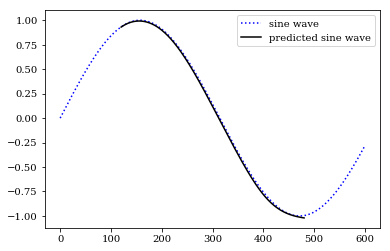

In [27]:
# 比較

plt.figure()
plt.plot(sine_wave(), linestyle='dotted', color='blue', label="sine wave")
plt.plot(predicted, color='black', label="predicted sine wave")
plt.legend()
plt.show()